In [96]:
#loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
column_names = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
df = pd.read_csv("/content/labtest/agaricus-lepiota.csv", header=None, names=column_names)
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,  StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [99]:
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [100]:

classes = df['class'].value_counts()

classes

class
e    4208
p    3916
Name: count, dtype: int64

In [101]:
X = df.loc[:, ['cap-shape', 'cap-color', 'ring-number', 'ring-type']]

y = df.loc[:, 'class']

In [102]:
encoder = LabelEncoder()

for i in X.columns:
    X[i] = encoder.fit_transform(X[i])

y = encoder.fit_transform(y)

In [103]:
#Training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X,y)

      cap-shape  cap-color  ring-number  ring-type
0             5          4            1          4
1             5          9            1          4
2             0          8            1          4
3             5          8            1          4
4             5          3            1          0
...         ...        ...          ...        ...
8119          3          4            1          4
8120          5          4            1          4
8121          2          4            1          4
8122          3          4            1          0
8123          5          4            1          4

[8124 rows x 4 columns] [1 0 0 ... 0 1 0]


In [106]:
#creating and training models
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
mlp_model = MLPClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True)
nb_model= GaussianNB()

In [107]:

mlp_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
svm_probs = svm_model.predict_proba(X_test)
nb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GaussianNB()

In [108]:
#making predictions
lr_pred = lr_model.predict(X_test)
mlp_pred = mlp_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
nb_pred = nb_model.predict(X_test)


In [109]:
lr_report = classification_report(y_test, lr_pred)
mlp_report = classification_report(y_test, mlp_pred)
knn_report = classification_report(y_test, knn_pred)
svm_report = classification_report(y_test, svm_pred)
nb_report = classification_report(y_test, nb_pred)

In [110]:
print('Logistic Regression')
print(lr_report)

print('MLP')
print(mlp_report)

print('KNN')
print(knn_report)

print('SVM')
print(svm_report)

print('Naïve Bayes)')
print(nb_report)


Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       871
           1       0.79      0.79      0.79       754

    accuracy                           0.80      1625
   macro avg       0.80      0.80      0.80      1625
weighted avg       0.80      0.80      0.80      1625

MLP
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       871
           1       0.84      0.88      0.86       754

    accuracy                           0.86      1625
   macro avg       0.86      0.86      0.86      1625
weighted avg       0.86      0.86      0.86      1625

KNN
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       871
           1       0.88      0.92      0.90       754

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91   

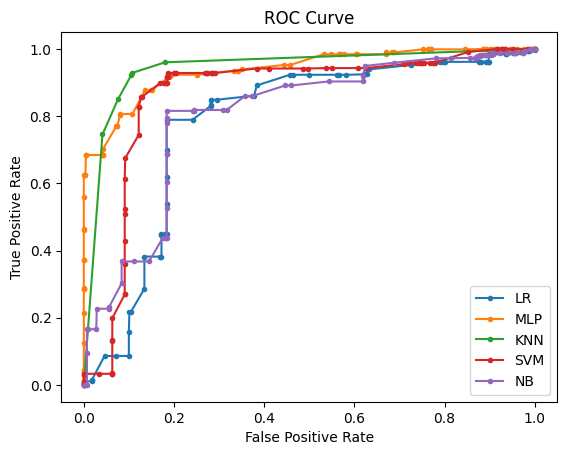

In [112]:
#ROC curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

lr_probs = lr_model.predict_proba(X_test)[:,1]
mlp_probs = mlp_model.predict_proba(X_test)[:,1]
knn_probs = knn_model.predict_proba(X_test)[:,1]
svm_probs = svm_model.predict_proba(X_test)[:,1]
nb_probs = nb_model.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)


plt.plot(lr_fpr, lr_tpr, marker='.', label='LR')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [113]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)


In [115]:
random_forest_report = classification_report(y_test, random_forest_pred)

print(random_forest_report)
#from this report i infered that KNN classification model is the best suitable for the given dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       871
           1       0.88      0.93      0.91       754

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

